# 1.0 IMPORTS

In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets as datasets
import sklearn.tree as tree
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection
import matplotlib.pyplot as plt

# 2. DECISION TREE ON IRIS DATASET (NO SPLIT)

In [2]:
# Load iris data frame
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Define
model1 = tree.DecisionTreeClassifier(max_depth=3)

# Fit
model1.fit(X, y)

# Predict
yhat = model1.predict(X)

# Performance
accuracy = metrics.accuracy_score(y, yhat)
precision = metrics.precision_score(y, yhat, average='weighted')
recall = metrics.recall_score(y, yhat, average='weighted')

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')

accuracy: 0.9733333333333334
precision: 0.9738247863247864
recall: 0.9733333333333334


## 2.1 How the tree splited

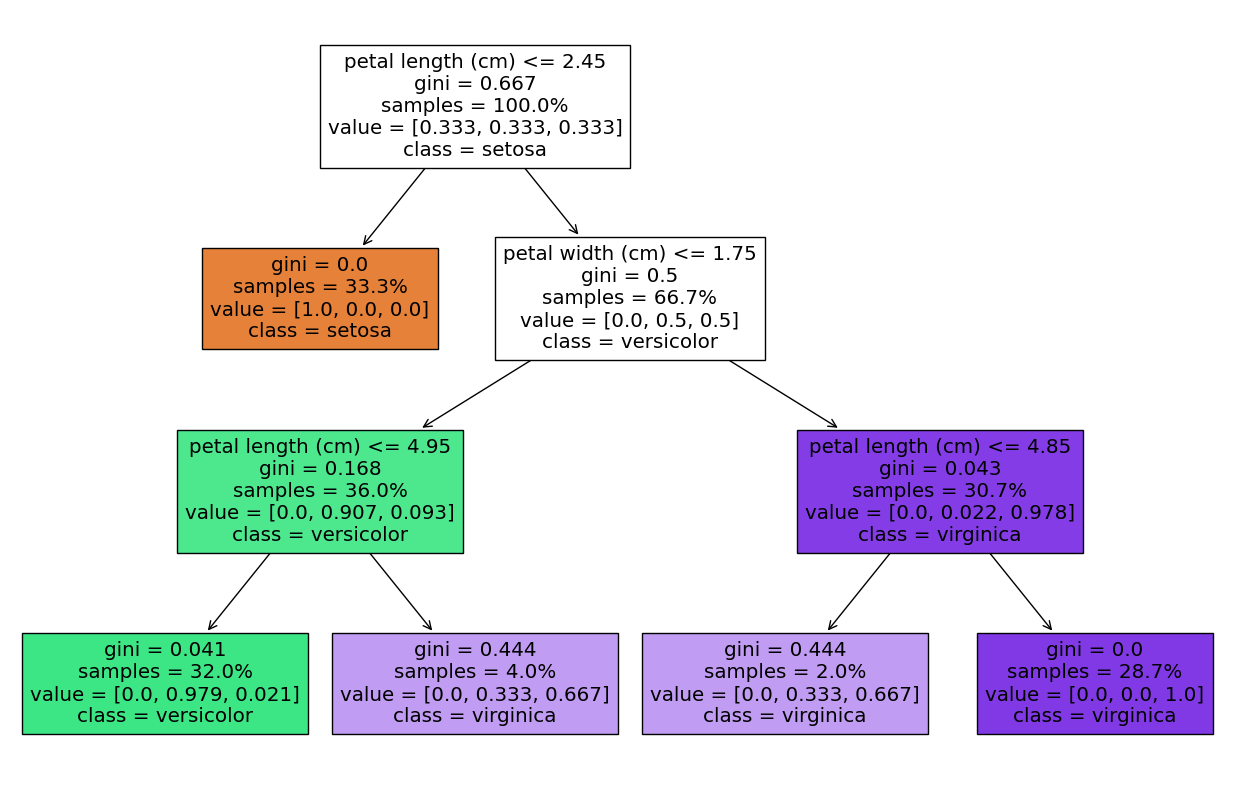

In [4]:
plt.figure(figsize=(16, 10))
tree.plot_tree(model1, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, proportion=True);

# 3. DECISION TREE ON CREDIT AVAILABILITY (NO SPLIT)

In [5]:
# Load data
df = pd.read_csv('../datasets/train.csv')
df.head()

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,limite_adicional
0,1767,21,278.172008,2577.05,24196.89636,104.306544,31.038763,6,5,7,21,14,9,15,Não,Não,Negar
1,11920,40,268.874152,2465.39,19227.37796,69.858778,36.917093,5,8,5,40,23,10,18,Não,Não,Negar
2,8910,36,446.643127,1055.29,42822.28223,134.201478,34.561714,0,3,6,26,13,3,15,Sim,Não,Negar
3,4964,58,321.141267,703.05,51786.82600,297.350067,31.493561,0,3,7,12,7,2,1,Sim,Não,Negar
4,10100,35,428.716114,891.29,44626.85346,134.201478,28.028887,2,8,7,24,10,8,20,Sim,Não,Negar


In [6]:
# Feature Selection
features = ['idade', 'saldo_atual', 'divida_atual', 'renda_anual', 'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos', 
            'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc', 'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']

target = ['limite_adicional']

# Create datasets
X = df.loc[:, features]
y = df.loc[:, target].values

In [7]:
# Train the model

# Define
model2 = tree.DecisionTreeClassifier(max_depth=8)

# Fit
model2.fit(X, y)

# Predict
yhat = model2.predict(X)

# Performance
accuracy = metrics.accuracy_score(y, yhat)
precision = metrics.precision_score(y, yhat, pos_label='Conceder')
recall = metrics.recall_score(y, yhat, pos_label='Conceder')

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')

accuracy: 0.8932631578947369
precision: 0.7376573088092934
recall: 0.506312292358804


In [8]:
# Check real class values
df['limite_adicional'].value_counts()

Negar       7995
Conceder    1505
Name: limite_adicional, dtype: int64

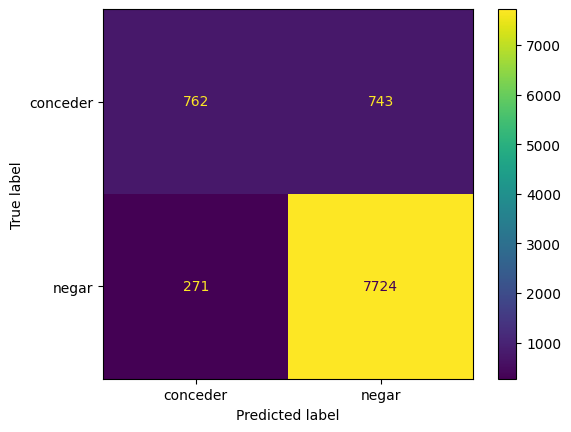

In [9]:
# Confusion Matrix
matrix = metrics.confusion_matrix(y, yhat)
matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['conceder', 'negar'])
matrix_display.plot();

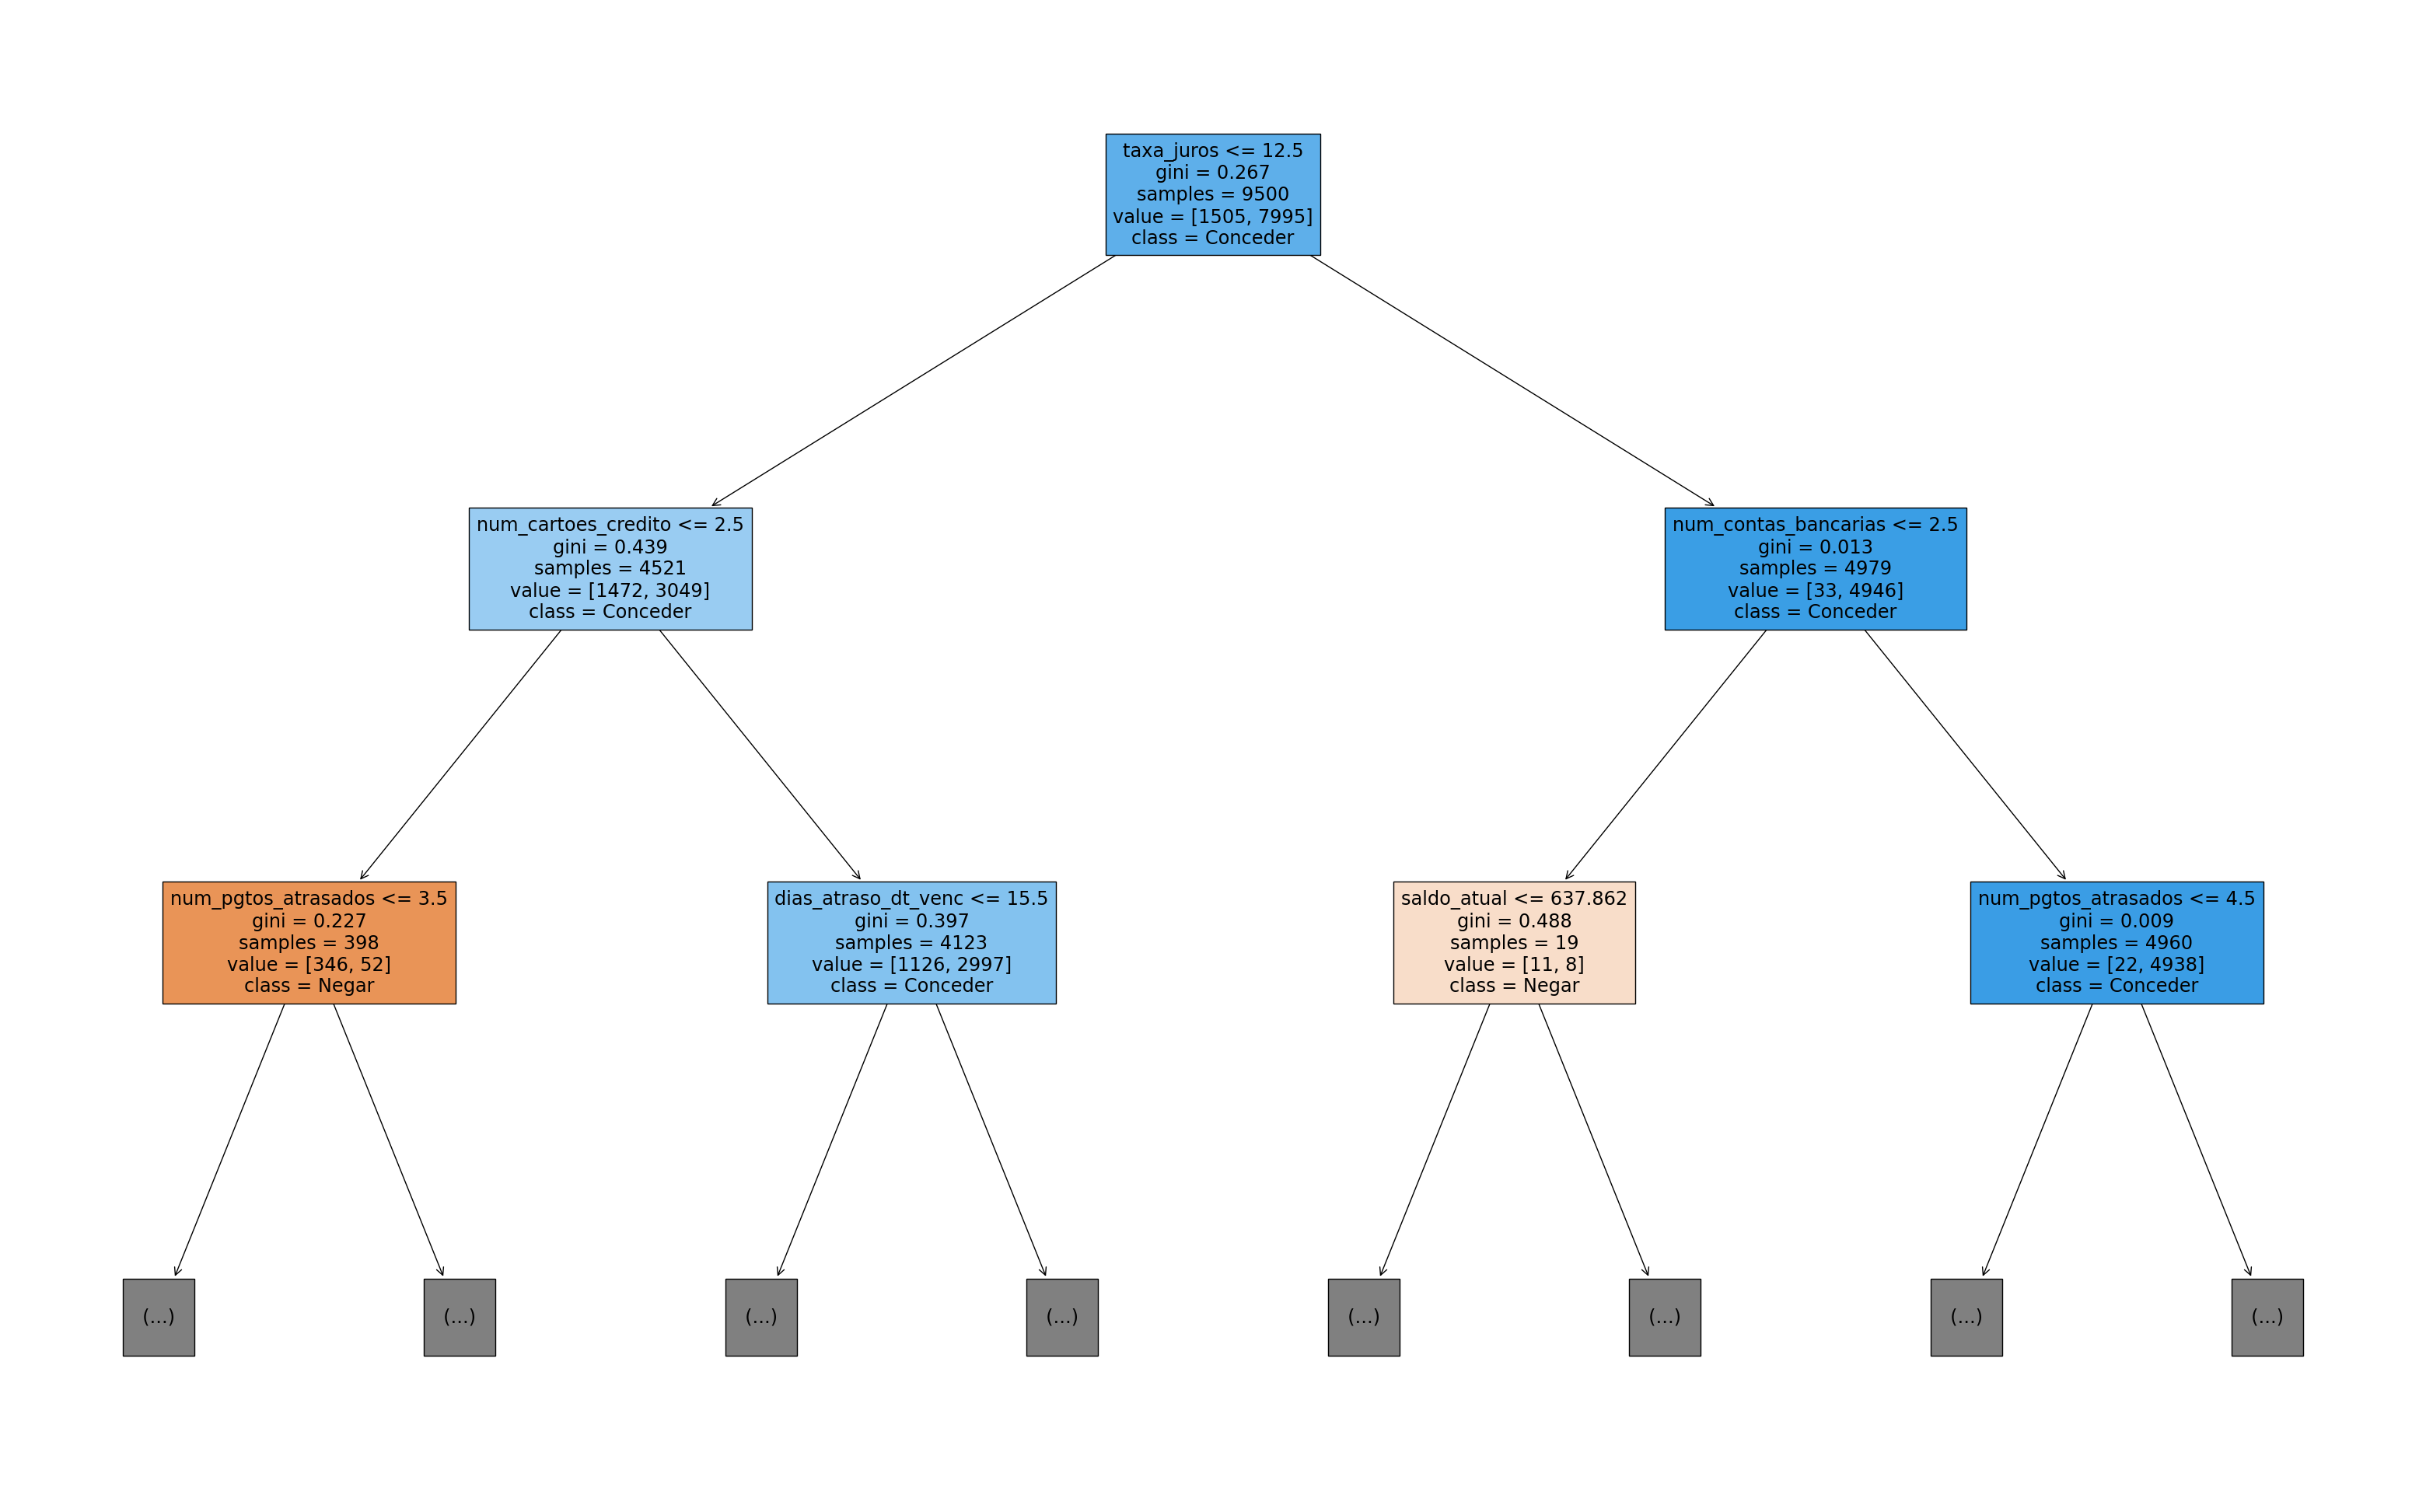

In [10]:
plt.figure(figsize=(40, 25))
tree.plot_tree(model2, filled=True, feature_names=features, class_names=['Negar', 'Conceder'], max_depth=2);

# 4. DECISION TREE ON CREDIT AVAILABILITY (WITH SPLIT AND TUNNING)

In [17]:
# Load data
df1 = pd.read_csv('../datasets/train.csv')

# Create datasets
X = df1.loc[:, features]
y = df1.loc[:, target].values

In [18]:
# Train/test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

# Train/val split
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [19]:
# Find best value for max_depth
values = [i for i in range(1, 20)]
scores = []

for i in values:

    model3 = tree.DecisionTreeClassifier(max_depth=i)

    model3.fit(X_train, y_train)

    yhat_val = model3.predict(X_val)
    f1_val = metrics.f1_score(y_val, yhat_val, pos_label='Conceder') #zero_division=0)
    scores.append(f1_val)

In [20]:
# Plot reuslt
plt.plot(scores, marker='o')
plt.show()

In [21]:
# Concat train and validation
X_train = pd.concat([X_train, X_val])
y_train = np.concatenate((y_train, y_val))

# define model with best value for i
model_pred = tree.DecisionTreeClassifier(max_depth=12)

# fit
model_pred.fit(X_train, y_train)

# predict
yhat_test = model_pred.predict(X_test)

# Performance
f1_test = metrics.f1_score(y_test, yhat_test, pos_label='Conceder')

print(f'F1 score: {f1_test}')

F1 score: 0.5536332179930795


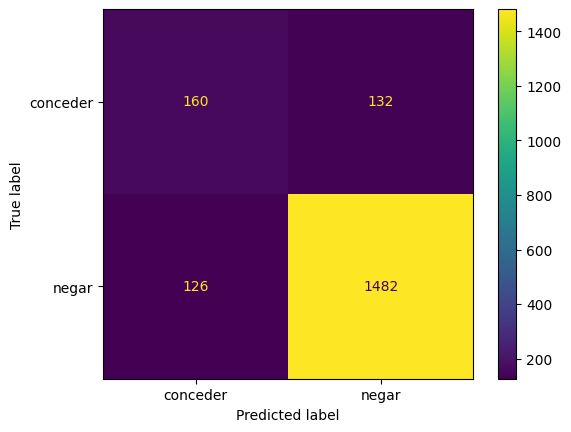

In [22]:
# Confusion Matrix
matrix = metrics.confusion_matrix(y_test, yhat_test)
matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['conceder', 'negar'])
matrix_display.plot();